## Prédictions de l'épaisseur de la banquise dans l'Arctique

Ce projet présente une analyse et des prédictions de l'épaisseur de la banquise dans une région spécifique de l'Arctique, basée sur les données du **Copernicus Climate Data Store**. Les données vont être filtrées pour une zone d'intérêt et analysées dans le but de prédire l'épaisseur moyenne de la glace pour les 10 prochaines années à l'aide de modèles ARIMA et de régression linéaire.

-  Récupération des données
-  Informations sur la variable sea_ice_thickness
- Sélection de la région Arctique
- Visualisation des épaisseurs de banquises en 2010 et en 2023
- Évolution de l'épaisseur moyenne de la banquise

### Récupération des données

On récupère les données liées à l'épaisseur de la banquise pour les mois d'avril 2003 à 2020. Il faut au préalable créer un compte sur le site du European Centre for Medium-Range Weather Forecasts (ECMWF). L'ECMWF est l'organisation qui héberge et gère la plateforme CDS pour Copernicus.

In [19]:
import xarray as xr
import os

# chemin vers le dossier contenant les fichiers NetCDF
folder_path = 'ice_2003_2020_avril'

# on liste tous les fichiers .nc dans le dossier
files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.nc')]

# chargement et fusion des fichiers
data = xr.open_mfdataset(files, combine='by_coords')

print(data)


<xarray.Dataset> Size: 37MB
Dimensions:                 (time: 18, yc: 432, xc: 432, nv: 2)
Coordinates:
    lat                     (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon                     (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
  * time                    (time) datetime64[ns] 144B 2003-04-01 ... 2020-04-01
  * xc                      (xc) float64 3kB -5.388e+03 -5.362e+03 ... 5.388e+03
  * yc                      (yc) float64 3kB 5.388e+03 5.362e+03 ... -5.388e+03
Dimensions without coordinates: nv
Data variables:
    quality_flag            (time, yc, xc) int8 3MB dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    sea_ice_thickness       (time, yc, xc) float32 13MB dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    status_flag             (time, yc, xc) int8 3MB dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    uncertainty             (time, yc, xc) float32 13MB dask.array<chunksize=(1, 432,

In [20]:
print(data.variables)


Frozen({'quality_flag': <xarray.Variable (time: 18, yc: 432, xc: 432)> Size: 3MB
dask.array<concatenate, shape=(18, 432, 432), dtype=int8, chunksize=(1, 432, 432), chunktype=numpy.ndarray>
Attributes:
    comment:                The expert assessment on retrieval quality is onl...
    coverage_content_type:  qualityInformation
    flag_meanings:          nominal_quality intermediate_quality low_quality ...
    flag_values:            [0 1 2 3]
    grid_mapping:           Lambert_Azimuthal_Grid
    long_name:              Sea Ice Thickness Quality Flag
    standard_name:          quality_flag
    units:                  1
    valid_max:              3
    valid_min:              0, 'sea_ice_thickness': <xarray.Variable (time: 18, yc: 432, xc: 432)> Size: 13MB
dask.array<concatenate, shape=(18, 432, 432), dtype=float32, chunksize=(1, 432, 432), chunktype=numpy.ndarray>
Attributes:
    ancillary_variables:    uncertainty status_flag quality_flag
    comment:                this field is t

In [21]:
print(data['time'])

<xarray.DataArray 'time' (time: 18)> Size: 144B
array(['2003-04-01T00:00:00.000000000', '2004-04-01T00:00:00.000000000',
       '2005-04-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2007-04-01T00:00:00.000000000', '2008-04-01T00:00:00.000000000',
       '2009-04-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2013-04-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2015-04-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2020-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 144B 2003-04-01 2004-04-01 ... 2020-04-01
Attributes:
    standard_name:          time
    long_name:              Time
    axis:                   T
    bounds:                 time_bnds
    coverage_content_type:  

### Informations sur la variable sea_ice_thickness

In [22]:
sea_ice_thickness = data['sea_ice_thickness']
print(sea_ice_thickness)

<xarray.DataArray 'sea_ice_thickness' (time: 18, yc: 432, xc: 432)> Size: 13MB
dask.array<concatenate, shape=(18, 432, 432), dtype=float32, chunksize=(1, 432, 432), chunktype=numpy.ndarray>
Coordinates:
    lat      (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon      (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
  * time     (time) datetime64[ns] 144B 2003-04-01 2004-04-01 ... 2020-04-01
  * xc       (xc) float64 3kB -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 3kB 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
Attributes:
    ancillary_variables:    uncertainty status_flag quality_flag
    comment:                this field is the primary sea ice thickness estim...
    coverage_content_type:  physicalMeasurement
    grid_mapping:           Lambert_Azimuthal_Grid
    long_name:              Sea Ice Thickness
    standard_name:          sea_ice_thickness
    units:                  m


In [24]:
print(data['lat'])
print(data['lon'])

<xarray.DataArray 'lat' (yc: 432, xc: 432)> Size: 1MB
dask.array<where, shape=(432, 432), dtype=float64, chunksize=(432, 432), chunktype=numpy.ndarray>
Coordinates:
    lat      (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon      (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
  * xc       (xc) float64 3kB -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 3kB 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
Attributes:
    coverage_content_type:  coordinate
    long_name:              latitude coordinate
    standard_name:          latitude
    units:                  degrees_north
<xarray.DataArray 'lon' (yc: 432, xc: 432)> Size: 1MB
dask.array<where, shape=(432, 432), dtype=float64, chunksize=(432, 432), chunktype=numpy.ndarray>
Coordinates:
    lat      (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon      (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
  * 

### Sélection de la région Arctique

In [25]:
latitudes = data['lat'].compute()
longitudes = data['lon'].compute()

# sélection des indices correspondant à la région Arctique (latitudes 60 à 90 degrés)
sea_ice_region = sea_ice_thickness.where(
    (latitudes >= 60) & (latitudes <= 90), drop=True
)

# structure de la région sélectionnée
print(sea_ice_region)


<xarray.DataArray 'sea_ice_thickness' (time: 18, yc: 264, xc: 264)> Size: 5MB
dask.array<where, shape=(18, 264, 264), dtype=float32, chunksize=(1, 264, 264), chunktype=numpy.ndarray>
Coordinates:
    lat      (yc, xc) float64 558kB 47.33 47.5 47.67 47.84 ... 47.67 47.5 47.33
    lon      (yc, xc) float64 558kB -135.0 -135.2 -135.4 ... 44.56 44.78 45.0
  * time     (time) datetime64[ns] 144B 2003-04-01 2004-04-01 ... 2020-04-01
  * xc       (xc) float64 2kB -3.288e+03 -3.262e+03 ... 3.262e+03 3.288e+03
  * yc       (yc) float64 2kB 3.288e+03 3.262e+03 ... -3.262e+03 -3.288e+03
Attributes:
    ancillary_variables:    uncertainty status_flag quality_flag
    comment:                this field is the primary sea ice thickness estim...
    coverage_content_type:  physicalMeasurement
    grid_mapping:           Lambert_Azimuthal_Grid
    long_name:              Sea Ice Thickness
    standard_name:          sea_ice_thickness
    units:                  m


### Visualisation des épaisseurs de banquises en 2010 et en 2023

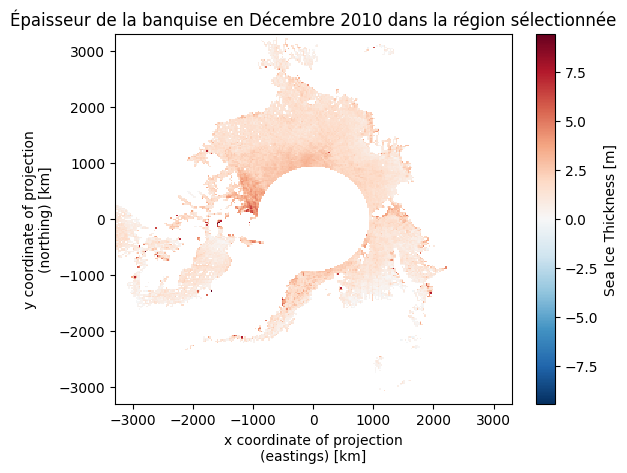

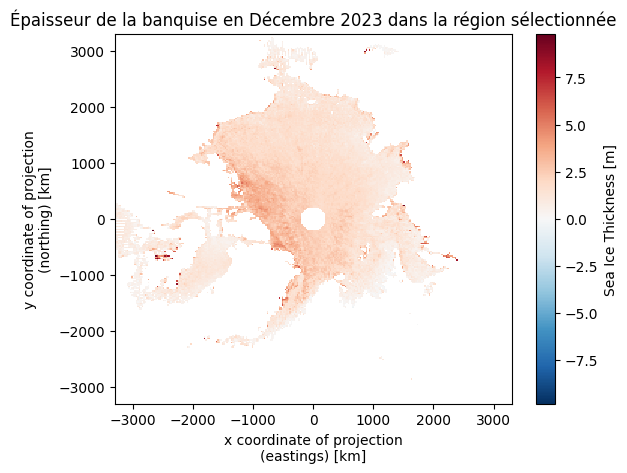

In [26]:
import matplotlib.pyplot as plt

sea_ice_region.isel(time=0).plot()
plt.title('Épaisseur de la banquise en Décembre 2010 dans la région sélectionnée')
plt.show()

sea_ice_region.isel(time=-1).plot()
plt.title('Épaisseur de la banquise en Décembre 2023 dans la région sélectionnée')
plt.show()


In [27]:
# sélection des eastings et northings
sea_ice_region = sea_ice_thickness.where(
    (data['xc'] >= 1000) & (data['xc'] <= 3000) &  # Eastings (x coordinate)
    (data['yc'] >= -3000) & (data['yc'] <= -1000),  # Northings (y coordinate)
    drop=True
)

print(sea_ice_region)


<xarray.DataArray 'sea_ice_thickness' (time: 18, yc: 80, xc: 80)> Size: 461kB
dask.array<where, shape=(18, 80, 80), dtype=float32, chunksize=(1, 80, 80), chunktype=numpy.ndarray>
Coordinates:
    lat      (yc, xc) float64 51kB dask.array<chunksize=(80, 80), meta=np.ndarray>
    lon      (yc, xc) float64 51kB dask.array<chunksize=(80, 80), meta=np.ndarray>
  * time     (time) datetime64[ns] 144B 2003-04-01 2004-04-01 ... 2020-04-01
  * xc       (xc) float64 640B 1.012e+03 1.038e+03 ... 2.962e+03 2.988e+03
  * yc       (yc) float64 640B -1.012e+03 -1.038e+03 ... -2.962e+03 -2.988e+03
Attributes:
    ancillary_variables:    uncertainty status_flag quality_flag
    comment:                this field is the primary sea ice thickness estim...
    coverage_content_type:  physicalMeasurement
    grid_mapping:           Lambert_Azimuthal_Grid
    long_name:              Sea Ice Thickness
    standard_name:          sea_ice_thickness
    units:                  m


### Évolution de l'épaisseur moyenne de la banquise

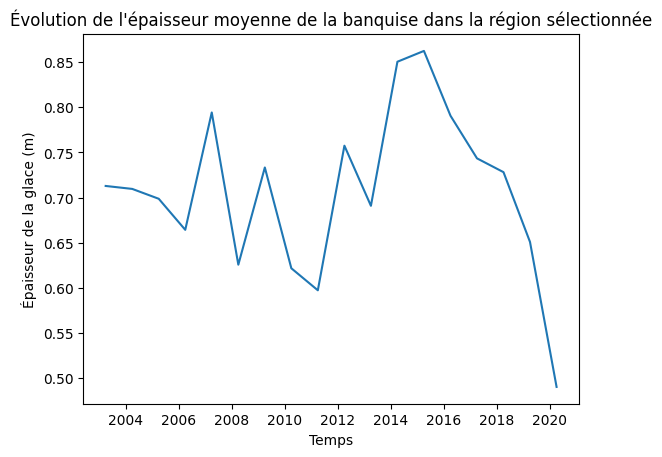

In [28]:
# moyenne de l'épaisseur de la glace pour chaque période (temps)
mean_thickness_per_time = sea_ice_region.mean(dim=['xc', 'yc'])

mean_thickness_per_time.plot()
plt.title('Évolution de l\'épaisseur moyenne de la banquise dans la région sélectionnée')
plt.ylabel('Épaisseur de la glace (m)')
plt.xlabel('Temps')
plt.show()


In [29]:
# conversion les données en DataFrame pandas
df = mean_thickness_per_time.to_dataframe().reset_index()

print(df.head())


        time  sea_ice_thickness
0 2003-04-01           0.712846
1 2004-04-01           0.709574
2 2005-04-01           0.698649
3 2006-04-01           0.664267
4 2007-04-01           0.794224


In [38]:
df

,time,sea_ice_thickness,year
0,2003-04-01,0.712846,2003
1,2004-04-01,0.709574,2004
2,2005-04-01,0.698649,2005
3,2006-04-01,0.664267,2006
4,2007-04-01,0.794224,2007
5,2008-04-01,0.625673,2008
6,2009-04-01,0.733306,2009
7,2010-04-01,0.621702,2010
8,2011-04-01,0.597327,2011
9,2012-04-01,0.757426,2012


Erreur quadratique moyenne : 0.007743216250160619


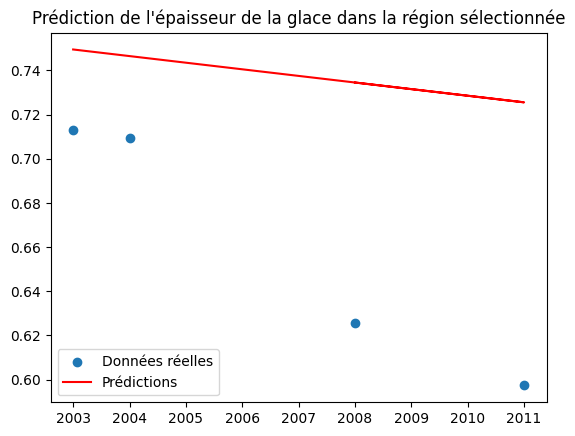

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df['year'] = df['time'].dt.year
X = df[['year']]
y = df['sea_ice_thickness']

# division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# entraînement d'un modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# prédiction
y_pred = model.predict(X_test)

# évaluation du modèle
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Erreur quadratique moyenne : {mse}')

plt.scatter(X_test, y_test, label='Données réelles')
plt.plot(X_test, y_pred, color='red', label='Prédictions')
plt.title('Prédiction de l\'épaisseur de la glace dans la région sélectionnée')
plt.legend()
plt.show()


In [33]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(df['sea_ice_thickness'], order=(5,1,0))
model_fit = model_arima.fit()

# prévisions pour les prochaines années
forecast = model_fit.forecast(steps=10)
print(forecast)


18    0.560271
19    0.483070
20    0.530138
21    0.583033
22    0.571880
23    0.615315
24    0.608308
25    0.590634
26    0.596719
27    0.573743
Name: predicted_mean, dtype: float64


In [35]:
# extraction de l'année à partir de la colonne 'time' (qui est en datetime64)
df['year'] = df['time'].dt.year

print(df[['time', 'year']].head())


        time  year
0 2003-04-01  2003
1 2004-04-01  2004
2 2005-04-01  2005
3 2006-04-01  2006
4 2007-04-01  2007


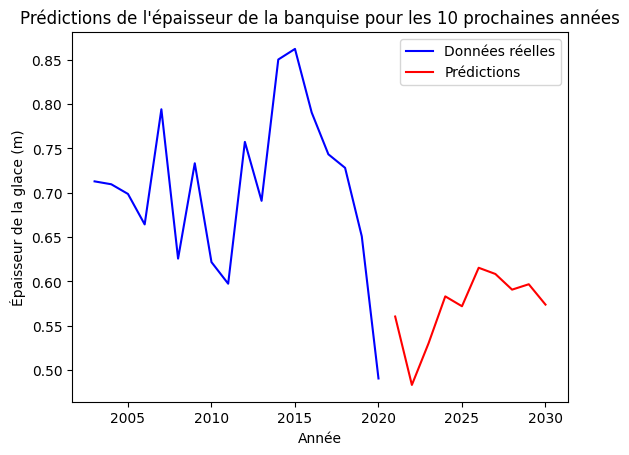

In [36]:
# index des prévisions : années à partir de la dernière année des données réelles
forecast_years = list(range(df['year'].iloc[-1] + 1, df['year'].iloc[-1] + 11))

plt.plot(df['year'], df['sea_ice_thickness'], label='Données réelles', color='blue')
plt.plot(forecast_years, forecast, label='Prédictions', color='red')

plt.title('Prédictions de l\'épaisseur de la banquise pour les 10 prochaines années')
plt.xlabel('Année')
plt.ylabel('Épaisseur de la glace (m)')
plt.legend()
plt.show()
